<a href="https://colab.research.google.com/github/miraclecomez/Data-Analyst/blob/main/Final_Project_Data_Visualization_Salman_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import library
import pandas as pd

# library visualization
import matplotlib.pyplot as plt
import seaborn as sns

#SOAL NOMER 1
Company wants to understand the Furniture Sales distribution. You as an analyst will help the company by
visualizing the sales in Furniture category.

In [3]:
# loading dataset
data_order = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Sample-Superstore%20-%20Orders.csv")
data_order.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
# Filtering data for Furniture Category
furniture_sales = data_order[data_order['Category'] == 'Furniture']

furniture_sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [10]:
# Create pivot table for total sales by sub-kategori
furniture_sales = furniture_sales.pivot_table(index='Sub-Category', values='Sales', aggfunc='sum').reset_index()

furniture_sales['Category'] = 'Furniture'

furniture_sales

,Sub-Category,Sales,Category
0,Bookcases,114879.9963,Furniture
1,Chairs,328449.1030,Furniture
2,Furnishings,91705.1640,Furniture
3,Tables,206965.5320,Furniture


In [11]:
# Grouping Furniture_sales = Sub-Category & Sales
furniture_sales = data_order[data_order['Category'] == 'Furniture']
sales_by_type = furniture_sales.groupby('Sub-Category')['Sales'].sum().reset_index()

# Menyortir hasil sales dari terendah ke tertinggi
sales_by_type = sales_by_type.sort_values(by='Sales', ascending=True)

sales_by_type

,Sub-Category,Sales
2,Furnishings,91705.1640
0,Bookcases,114879.9963
3,Tables,206965.5320
1,Chairs,328449.1030


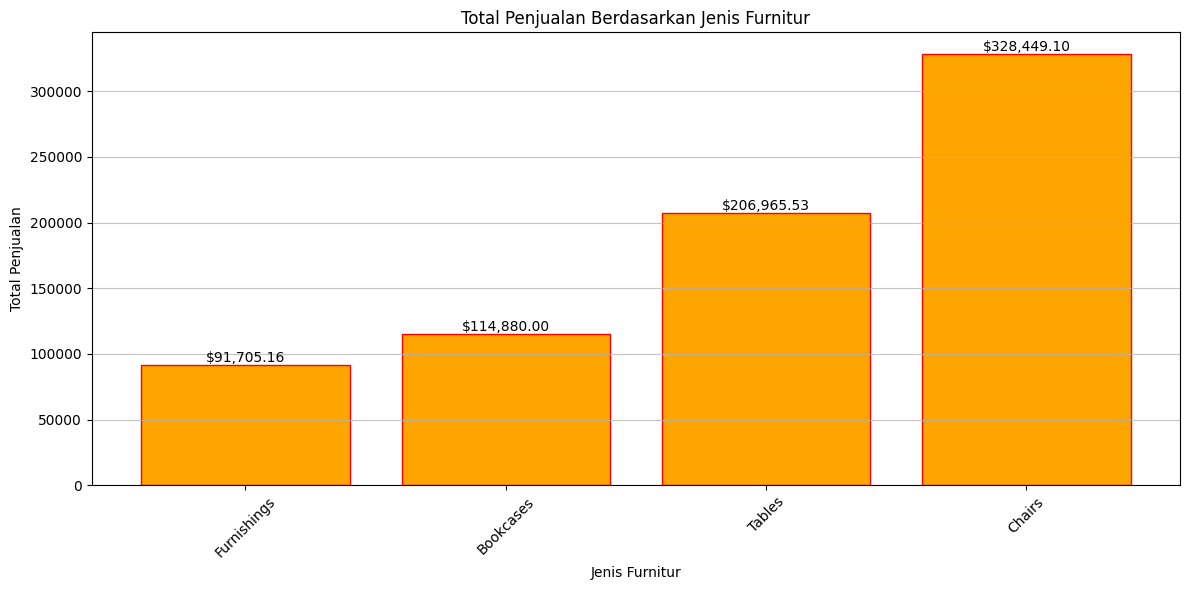

In [110]:
# Menambahkan ukuran canvas
plt.figure(figsize=(12, 6))

# Membuat struktur bar chart
bars = plt.bar(sales_by_type['Sub-Category'], sales_by_type['Sales'], color='orange', edgecolor='red')

# Menampilkan total sales pada setiap sub-category
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.2f}', ha='center', va='bottom', fontsize=10)

# Menambahkan elemen tambahan
plt.title('Total Penjualan Berdasarkan Jenis Furnitur')
plt.xlabel('Jenis Furnitur')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

#Menampilkan visualisasi
plt.show()

#SOAL NOMER 2
Business Development needs your help to understand the total Sales in each region. So, you will visualize the the
total Sales in each Region to support the business development decision to increase the exposure of the
company growth.

In [ ]:
def pivot_table(data, row, val, agg):
  region_id = pd.pivot_table(data, index=row, values=val, aggfunc=agg).reset_index()

  return region_id

In [8]:
# Membuat pivot table dengan variable region_id
region_id = pd.pivot_table(data_order, index="Region", values="Sales", aggfunc="sum").reset_index()

# sorting values sales dari terendah ke tertinggi
region_id = region_id.sort_values(by='Sales', ascending=True)

region_id

,Region,Sales
2,South,391721.9050
0,Central,501239.8908
1,East,678781.2400
3,West,725457.8245


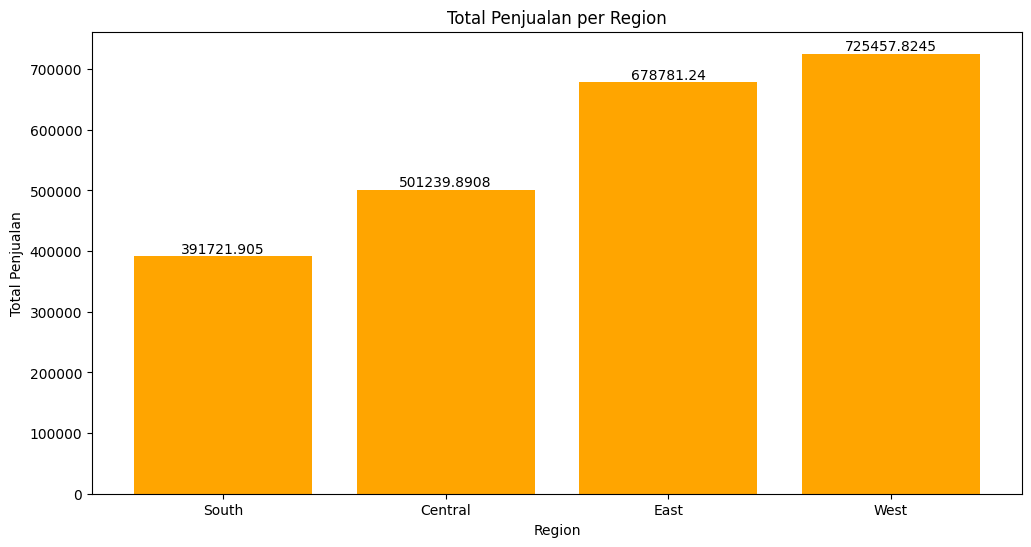

In [10]:
# Mengatur frame lebar x tinggi
plt.figure(figsize=(12, 6))

# struktur grafik bar chart
plt.bar(region_id['Region'], region_id['Sales'], color='orange')


# Menambahkan data labels
total_count = region_id['Sales'].sum()

for idx, value in enumerate(region_id['Sales']):
    percent = (value / total_count) * 100

# plt.text(idx, value, f'{value}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=10)
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=10)

# Menambahkan elemen pada bar chart
plt.title('Total Penjualan per Region')
plt.xlabel('Region')
plt.ylabel('Total Penjualan')

# Menampilkan hasil visualisasi
plt.show()

#SOAL NOMER 3
Suppose you are working in the e-commerce industry and want to analyze the relationship between profit and
sales for a dataset superstore. You also want to visualize the data for presentation to your team.

In [86]:
# Melihat missing values pada dataset
print(data_order.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [89]:
# Menghapus missing values pada Sales dan Profit
data_order.dropna(subset=['Sales', 'Profit'], inplace=True)

data_order.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [92]:
# Melihat korelasi antara sales dan profit
correlation = data_order['Sales'].corr(data_order['Profit'])

# Memberikan text jika berkorelasi
print(f"Korelasi antara Sales dan Profit: {correlation:.2f}")

Korelasi antara Sales dan Profit: 0.48


<function matplotlib.pyplot.show(close=None, block=None)>

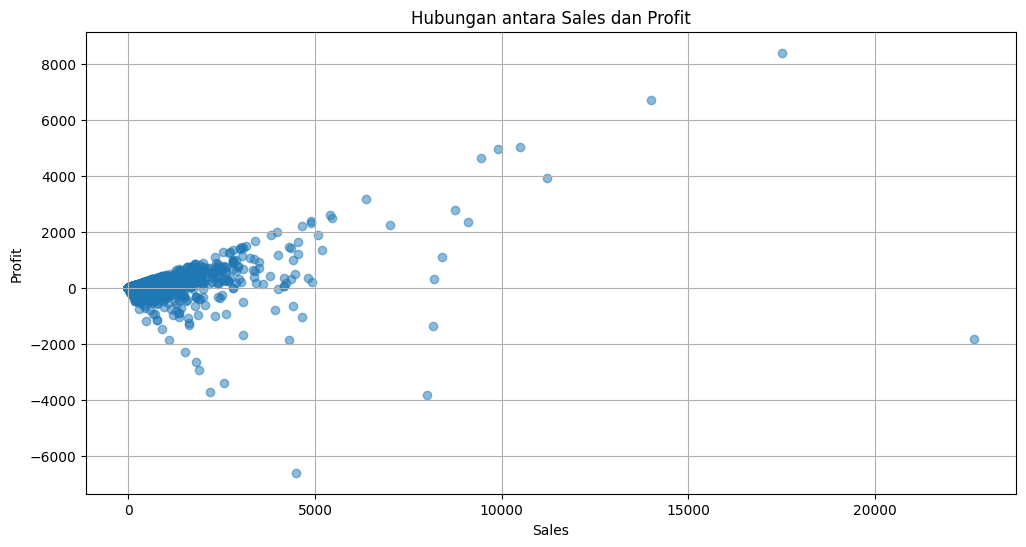

In [4]:
# Membuat visualisasi dengan scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data_order['Sales'], data_order['Profit'], alpha=0.5)
plt.title('Hubungan antara Sales dan Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)

# Menampilkan visualisasi
plt.show

#SOAL NOMER 4
Company want to assess the profitability of orders in each ship mode. This is a step to figure out the financial
health to transfer the product from the transactions that have been done by the customers

In [ ]:
# Create pivot table ship_profit
ship_profit = pivot_table(data=data_order, row='Ship Mode', val='Profit', agg='sum')

# sorting quantity
ship_profit = ship_profit.sort_values(by='Profit', ascending=False)

ship_profit

,Ship Mode,Profit
3,Standard Class,164088.7875
2,Second Class,57446.6354
0,First Class,48969.8399
1,Same Day,15891.7589


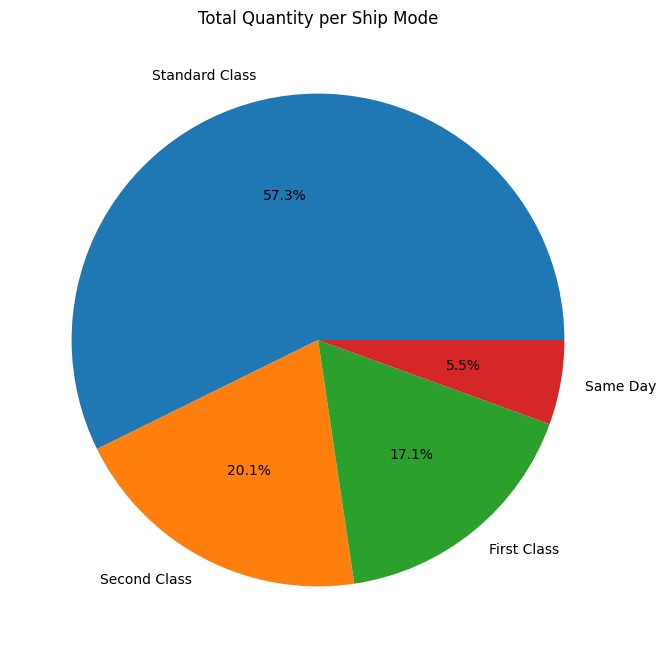

In [ ]:
# grafik pie chart

# atur dulu frame lebar x tinggi
plt.figure(figsize=(10, 8))

# struktur grafik pie chart
plt.pie(ship_profit['Profit'], labels=ship_profit['Ship Mode'], autopct='%1.1f%%')

# tambahan elemen
plt.title('Total Quantity per Ship Mode')
plt.show()

# SOAl NOMER 5
The commercial and sales team wants to monitor the sales and profit after they do the experiment. So, they
need your help to provide the trend of sales and profit on March 2014.

In [13]:
data_order_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [15]:
# Filtering data on March 2014
march_2014_data = data_order_new[(data_order_new['Order Date'].dt.year == 2014) & (data_order_new['Order Date'].dt.month == 3)]

march_2014_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
157,158,CA-2014-104269,2014-03-01,3/6/2014,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,...,98115,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.2,51.4764
195,196,CA-2014-140004,2014-03-21,3/25/2014,Standard Class,CB-12025,Cassandra Brandow,Consumer,United States,Hamilton,...,45011,East,OFF-AR-10004685,Office Supplies,Art,Binney & Smith Crayola Metallic Colored Pencil...,7.408,2,0.2,1.2038
196,197,CA-2014-140004,2014-03-21,3/25/2014,Standard Class,CB-12025,Cassandra Brandow,Consumer,United States,Hamilton,...,45011,East,OFF-AR-10004027,Office Supplies,Art,Binney & Smith inkTank Erasable Desk Highlight...,6.048,3,0.2,1.5876
555,556,CA-2014-155852,2014-03-03,3/7/2014,Second Class,AJ-10945,Ashley Jarboe,Consumer,United States,Wilmington,...,28403,South,OFF-AR-10003560,Office Supplies,Art,Zebra Zazzle Fluorescent Highlighters,19.456,4,0.2,3.4048
602,603,CA-2014-149958,2014-03-15,3/19/2014,Standard Class,AS-10240,Alan Shonely,Consumer,United States,Tampa,...,33614,South,OFF-ST-10001490,Office Supplies,Storage,"Hot File 7-Pocket, Floor Stand",142.776,1,0.2,17.8470


In [16]:
# Aggregate sales and profit trend
sales_profit_trend = march_2014_data.groupby(march_2014_data['Order Date'].dt.date).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

sales_profit_trend.head(5)

,Order Date,Sales,Profit
0,2014-03-01,2203.151,-208.9614
1,2014-03-02,202.384,56.0112
2,2014-03-03,1345.892,-629.7989
3,2014-03-04,370.452,20.0778
4,2014-03-05,705.562,261.1901


<function matplotlib.pyplot.show(close=None, block=None)>

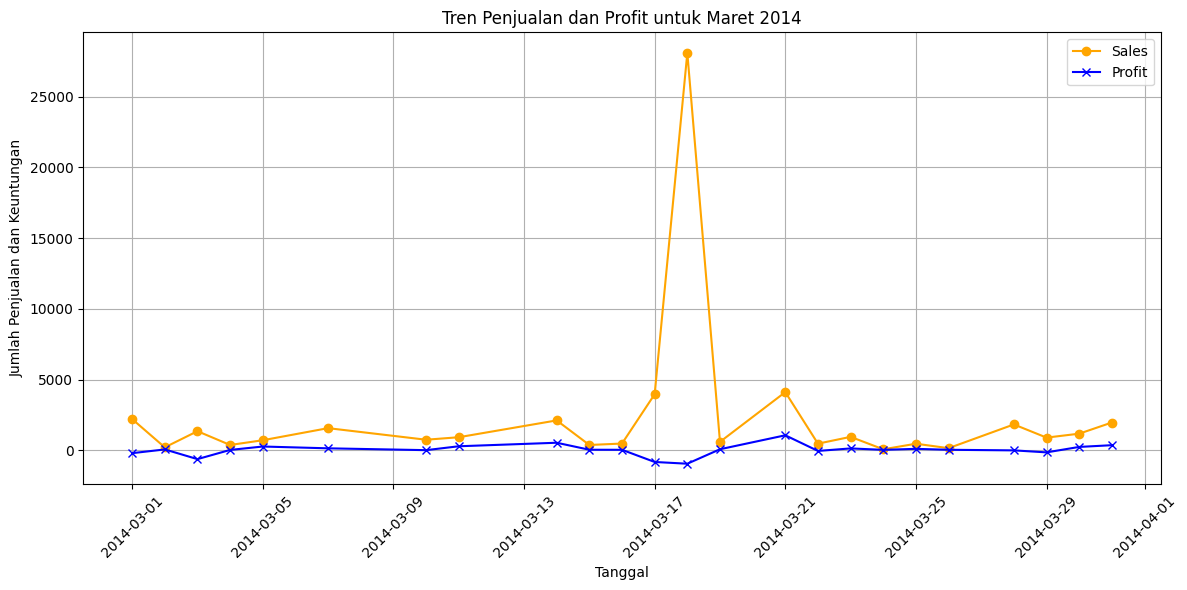

In [17]:
# Visualisasi trend sales dan profit
plt.figure(figsize=(12, 6))
plt.plot(sales_profit_trend['Order Date'], sales_profit_trend['Sales'], marker='o', color='orange', label='Sales')
plt.plot(sales_profit_trend['Order Date'], sales_profit_trend['Profit'], marker='x', color='blue', label='Profit')

# Menambahkan judul dan label
plt.title('Tren Penjualan dan Profit untuk Maret 2014')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan dan Keuntungan')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show

#SOAL NOMER 6
One full year has passed in 2014, company wants to evaluate the transactions that are made in each Segment.
This is really good for the 2015 strategy to maximize the transactions in the particular segment

In [5]:
# Showing structure dataset
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
# Copy old dataset with the new variable
data_order_new = data_order.copy()

# Change data type into date format
data_order_new['Order Date'] = data_order_new['Order Date'].astype('datetime64[ns]')

# Check data type
data_order_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

<ipython-input-76-b3969487beba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_2014['Month'] = past_2014['Order Date'].dt.to_period('M')
<ipython-input-76-b3969487beba>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(str(structure_line.index[idx]), structure_line['Order ID'][segment][idx],


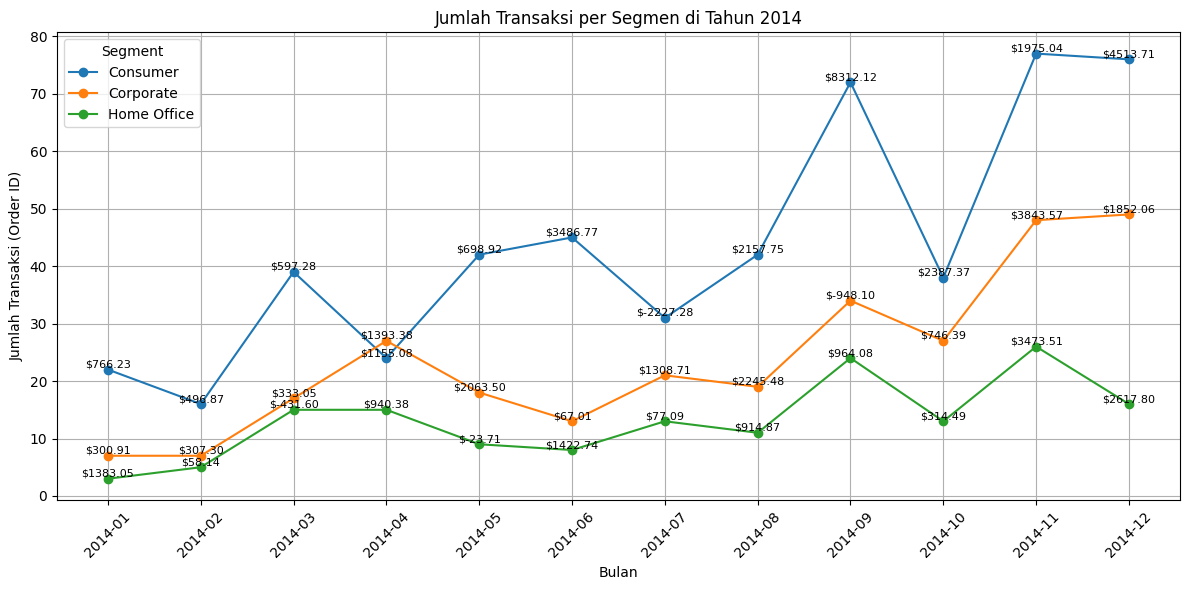

In [ ]:
# Filtering data 2014
past_2014 = data_order_new[(data_order_new['Order Date'] >= '2014-01-01') & (data_order_new['Order Date'] <= '2014-12-31')]

# Adding mounth column for mounthly analysis
past_2014['Month'] = past_2014['Order Date'].dt.to_period('M')

# Membuat pivot table untuk menghitung jumlah Order ID dan total Profit per segmen per bulan
structure_line = past_2014.pivot_table(index='Month', columns='Segment', values=['Order ID', 'Profit'],
                                        aggfunc={'Order ID': pd.Series.nunique, 'Profit': 'sum'}, fill_value=0)

# Sorting index by mounth
structure_line = structure_line.sort_index()

# Prepare frame size
plt.figure(figsize=(12, 6))

# Membuat grafik line chart untuk jumlah Order ID
for segment in structure_line['Order ID'].columns:
    plt.plot(structure_line.index.astype(str), structure_line['Order ID'][segment], marker='o', label=segment)

# Input label profit di setiap titik
for segment in structure_line['Profit'].columns:
    for idx, value in enumerate(structure_line['Profit'][segment]):
        plt.text(str(structure_line.index[idx]), structure_line['Order ID'][segment][idx],
                 f'${value:.2f}', ha='center', va='bottom', fontsize=8)

# Adding additionals element
plt.title('Jumlah Transaksi per Segmen di Tahun 2014')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi (Order ID)')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid()

# Showing Visualization
plt.tight_layout()
plt.show()

In [1]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [5]:
!jupyter nbconvert --version

7.16.6


In [ ]:
!sudo apt-get install pandoc

In [6]:
# Converting code to pdf file
!jupyter nbconvert --to pdf '/content/drive/MyDrive/MINI PROJECT DIGITAL SKOLA/MINPRO (3)/Final Project - Salman Adam.ipynb'

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 5, in <module>
    from nbconvert.nbconvertapp import main
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 193, in <module>
    class NbConvertApp(JupyterApp):
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 340, in NbConvertApp
    {get_export_names()}
     ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/base.py", line 145, in get_export_names
    e = get_exporter(exporter_name)(config=config)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/base.py", line 104, in get_exporter
    exporters = entry_points(group="nbconvert.exporters")
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/metadata/__init__.py", line 1041, in entry_points
    return SelectableGroups.load(eps).select(**params)
           ^^^^